In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers, regularizers

In [2]:
train=pd.read_csv('SQLIV3_cleaned2.csv')
test=pd.read_csv('sqliv2_utf8.csv')


In [3]:
train.Label.value_counts()


Label
0    19268
1    11346
Name: count, dtype: int64

In [4]:

learning_rate=0.01

no_epochs=27

In [5]:
model = Sequential()


In [6]:

model.add(Dense(1, input_dim=3000, activation='sigmoid'))  # une seule couche Couche de sortie

c:\Users\ASUS ROG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [8]:
train.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [9]:
train_x = train['Sentence'].values
train_y = train['Label'].values

##test_x = test['Sentence'].values
##test_y = test['Label'].values

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
train_x = vectorizer.fit_transform(train_x).toarray()



In [11]:
history = model.fit(train_x, train_y, epochs=no_epochs, batch_size=32, verbose=2, validation_split=0.2)


Epoch 1/27
766/766 - 2s - 3ms/step - accuracy: 0.5936 - loss: 0.6805 - val_accuracy: 1.0000 - val_loss: 0.6302
Epoch 2/27
766/766 - 2s - 2ms/step - accuracy: 0.6836 - loss: 0.6580 - val_accuracy: 0.9997 - val_loss: 0.6058
Epoch 3/27
766/766 - 2s - 2ms/step - accuracy: 0.7748 - loss: 0.6376 - val_accuracy: 0.9997 - val_loss: 0.5866
Epoch 4/27
766/766 - 2s - 2ms/step - accuracy: 0.8009 - loss: 0.6186 - val_accuracy: 0.9995 - val_loss: 0.5791
Epoch 5/27
766/766 - 2s - 2ms/step - accuracy: 0.8357 - loss: 0.6009 - val_accuracy: 0.9993 - val_loss: 0.5630
Epoch 6/27
766/766 - 2s - 2ms/step - accuracy: 0.8499 - loss: 0.5843 - val_accuracy: 0.9990 - val_loss: 0.5503
Epoch 7/27
766/766 - 2s - 3ms/step - accuracy: 0.8605 - loss: 0.5689 - val_accuracy: 0.9987 - val_loss: 0.5419
Epoch 8/27
766/766 - 2s - 3ms/step - accuracy: 0.8721 - loss: 0.5545 - val_accuracy: 0.9985 - val_loss: 0.5299
Epoch 9/27
766/766 - 2s - 2ms/step - accuracy: 0.8819 - loss: 0.5410 - val_accuracy: 0.9980 - val_loss: 0.5189
E

In [12]:
# Affichage de la loss et accuracy après l'entraînement
print("Final Training Loss:", history.history['loss'][-1])
print("Final Training Accuracy:", history.history['accuracy'][-1])



Final Training Loss: 0.3927224278450012
Final Training Accuracy: 0.9200522899627686


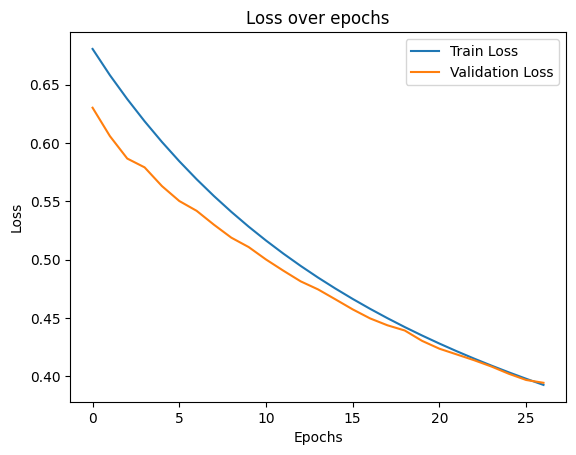

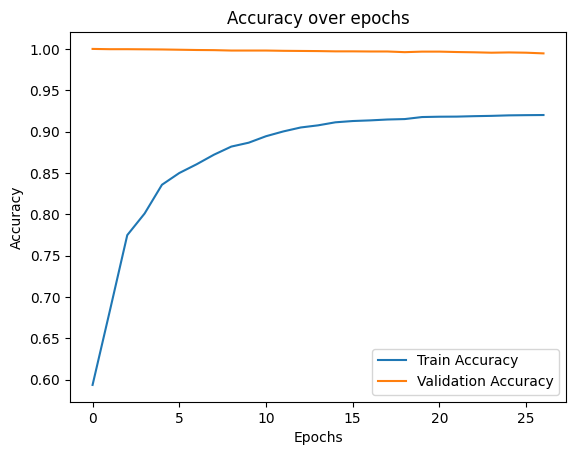

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_x = test['Sentence'].values
test_y = test['Label'].values
print(test.isnull().sum())


Sentence    3
Label       0
dtype: int64


In [15]:
test = test.dropna(subset=['Sentence'])



In [16]:
# Filtrer les lignes où Label == 1
filtered = test[test['Label'] == 1]

# Récupérer les 1000 exemples dans test_x et test_y
test_x = filtered['Sentence'].values
test_y = filtered['Label'].values


test_x = vectorizer.transform(test_x).toarray()

In [17]:
predictions = model.predict(test_x)


358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
# Convertir les probabilités en classes binaires
predicted_classes = (predictions >= 0.5).astype(int)

# Afficher les 20 premières prédictions
print(predicted_classes.flatten())


[1 0 0 ... 1 1 0]


In [19]:
# Compter le nombre de prédictions égales à 1
nombre_de_sql_injections = (predicted_classes == 1).sum()

print(f"Nombre de requêtes détectées comme SQL injection : {nombre_de_sql_injections}")


Nombre de requêtes détectées comme SQL injection : 9518


In [20]:
test.Label.value_counts()


Label
0    22304
1    11453
Name: count, dtype: int64

In [21]:
print(f"accuracy aprés tester avec le deuxiéme dataset est = {nombre_de_sql_injections/len(test_x)}")

accuracy aprés tester avec le deuxiéme dataset est = 0.8310486335457958


In [22]:
# Filtrer les lignes où Label == 1
filtered2 = test[test['Label'] == 0]

# Récupérer les 1000 exemples dans test_x et test_y
test_x2 = filtered2['Sentence'].values
test_y2 = filtered2['Label'].values


test_x2 = vectorizer.transform(test_x2).toarray()

In [23]:
predictions2 = model.predict(test_x2)


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


In [24]:
# Convertir les probabilités en classes binaires
predicted_classes2 = (predictions2 >= 0.5).astype(int)

# Afficher les 20 premières prédictions
print(predicted_classes2.flatten())


[0 0 0 ... 0 0 0]


In [25]:
# Compter le nombre de prédictions égales à 1
nombre_de_non_sql_injections = (predicted_classes2 == 0).sum()

print(f"Nombre de requêtes non détectées comme SQL injection : {nombre_de_non_sql_injections}")


Nombre de requêtes non détectées comme SQL injection : 22288


In [26]:
test.Label.value_counts()


Label
0    22304
1    11453
Name: count, dtype: int64

In [27]:
print(f"accuracy apres testé avec le deuxiéme datset avec les non sql injection est ={nombre_de_non_sql_injections/len(test_x2)} ")

accuracy apres testé avec le deuxiéme datset avec les non sql injection est =0.9992826398852224 
